# ITS-1D.ipynb
Inverse Transform Sampling for a Gaussian Mixture

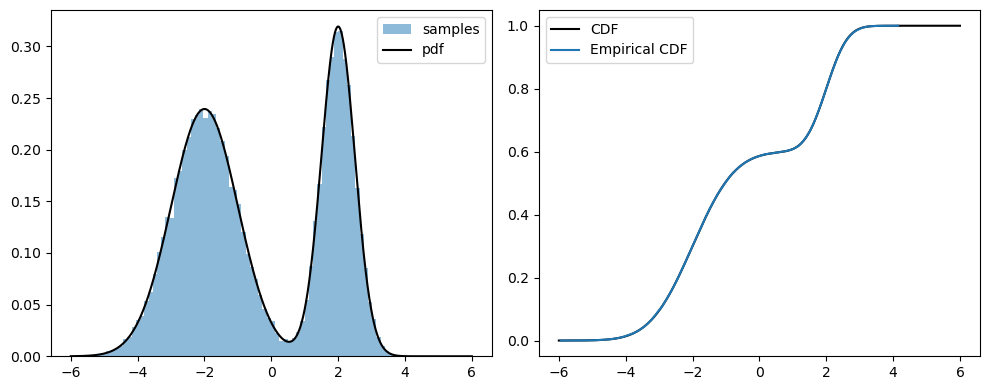

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import os

os.makedirs("figs", exist_ok=True)

# Define mixture pdf
def pdf(x):
    return 0.6*norm.pdf(x, -2, 1) + 0.4*norm.pdf(x, 2, 0.5)

# Build grid and compute CDF
xs = np.linspace(-6, 6, 20000)
pdf_vals = pdf(xs)
cdf = np.cumsum(pdf_vals)
cdf /= cdf[-1]

# Inverse CDF via interpolation
def inv_cdf(u):
    return np.interp(u, cdf, xs)

# Sample
U = np.random.rand(50000)
samples = inv_cdf(U)

# Plot panels
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(samples, bins=80, density=True, alpha=0.5, label="samples")
plt.plot(xs, pdf_vals, 'k-', label="pdf")
plt.legend()

plt.subplot(1,2,2)
plt.plot(xs, cdf, 'k-', label="CDF")
# empirical CDF
emp_cdf = np.linspace(0,1,len(samples))
plt.step(np.sort(samples), emp_cdf, where='post', label="Empirical CDF")
plt.legend()

plt.tight_layout()
plt.savefig("figs/ITS_mixture_panels.png")
plt.show()
